# <center> Fundamentos de Robótica Móvil
# <center> Trabajo Práctico 1

#### <center> Juarez, Cotos, Gonzalez, Irato
    


### Parte 1

**1-Determinar de forma analítica el radio del camino circular que realiza el robot al ajustar la velocidad lineal y angular a valores constantes.**


Según la fórmula de velocidad lineal ($v$)

$$v = r \cdot \omega$$


Por lo tanto

$$r = \frac{v}{\omega}$$

**2-Realizar el cálculo con valores numéricos para dos velocidades cualesquiera teniendo en cuenta las velocidades máximas del robot. Nota: Tener en cuenta los límites de velocidad y los parámetros cinemáticos (el radio de la rueda R y la distancia entre ruedas b) del robot.**

Se usa: 
      
$$v = 0.1 \frac{m}{s}$$ 
$$\omega = 1 \frac{rad}{s}$$

In [ ]:
v = 0.1 #m/s
w = 1 #rad/seg
r = v/w #m
print ('r = ',r, 'm')

w =  0.1 rad/s


y 
$$v = 0.05 \frac{m}{s}$$
$$\omega = 1 \frac{rad}{s}$$

In [ ]:
v = 0.05 #m/s
w = 1 #rad/seg
r = v/w #m
print ('r = ',r, 'm')

**3-Calcular la velocidad lineal y angular para que el robot realice un camino circular con un radio a elección entre 0,5m y 2,0m.**
Se elige:
$$r=1m$$
$$v=0.1 \frac{m}{s}$$

In [ ]:
r = 1 #m
v = 0.1 #m/s
w = v/r #rad/s
print ('v = ',v,'m/s')
print ('w = ',w,'rad/s')

**4-Calcular las velocidades lineales y angulares de las ruedas (izquierda y derecha) del robot para el camino circular del punto anterior.**

$r=1m$ y $b=0.28m$

Se tienen dos ecuaciones

$$v = r \cdot \frac{\omega_R + \omega_L}{2}$$

$$\omega = r \cdot \frac{\omega_R - \omega_L}{2}$$

Se crea un sistema de dos ecuaciones

$$v = \frac{1}{2}\cdot \omega_R + \frac{1}{2}\cdot \omega_L$$

$$\omega = \frac{1}{0.28}\cdot\omega_R - \frac{1}{0.28}\cdot \omega_L$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Datos
v= 0.1 #m/s
r=1 #m
w=1 #rad/s
b= 0.28 #m

A = np.matrix([[r/2, r/2],[r/b, -r/b]]) 
B = np.matrix([[v],[w]]) 

x = np.matmul(A**-1,B) 

print('Velocidad angular rueda derecha w_R =',x[0],'rad/s')
print('Velocidad angular rueda izquierda w_L =',x[1],'rad/s')

v_L = x[0]*r
v_R = x[1]*r

print('Velocidad lineal rueda Derecha v_R = ',v_R,'m/s')
print('Velocidad lineal rueda izquierda v_L = ',v_L,'m/s')

Velocidad angular rueda derecha w_R = [[0.24]] rad/s
Velocidad angular rueda izquierda w_L = [[-0.04]] rad/s
Velocidad lineal rueda Derecha v_R =  [[-0.04]] m/s
Velocidad lineal rueda izquierda v_L =  [[0.24]] m/s


**5-¿Qué sucede si se intercambian las velocidades de ruedas entre izquierda y derecha?**

Lo que sucede es que el robot realiza el mismo circulo pero de forma reflejada

### Parte 2

**1-Generar un registro (log) de odometría y velocidad del robot con el robot en movimiento mediante teleoperación por teclado. Para ello ejecutar nuevamente la simulación y utilizar el nodo ROS dump_odom.**

In [3]:
import io
import pandas as pd

log_odo = 'log.txt' # Se cargar el archivo de odometria  
tabla = pd.read_csv(log_odo, header = None, delim_whitespace=True ) 
# Se define nombre de las columnas 
tabla.columns =['Tiempo', 'Posicion X', 'Posicion Y', 'Orientacion', 'Vel Lin', 'Vel Ang']
# Se omite las filas con valres en cero
tabla = tabla.loc[~(tabla == 0).all(axis=1)]
# Se setea el tiem stap en cero
tabla['Tiempo'] -= tabla['Tiempo'].min()

tabla[:5] 

C:\Users\DaniBrem\AppData\Local\Temp\ipykernel_728\2547254373.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  tabla = pd.read_csv(log_odo, header = None, delim_whitespace=True )


,Tiempo,Posicion X,Posicion Y,Orientacion,Vel Lin,Vel Ang
0,0,0.031509,-0.000001,0.000002,0.000003,-1.297055e-07
1,28511118,0.031510,-0.000001,0.000002,0.000002,-1.321104e-07
2,56072180,0.031510,-0.000001,0.000002,0.000004,-1.210719e-07
3,111127043,0.031510,-0.000001,0.000002,0.000003,-1.220104e-07
4,143846984,0.031510,-0.000001,0.000002,0.000003,-1.351338e-07


**2-Escribir un script en Python que cargue los datos del archivo  de registro y genere gráficos de: 

i) el camino seguido por el robot 

ii) la trayectoria (pose respecto al tiempo)

iii) la velocidad del robot respecto al tiempo.

**

Text(0.5, 1.0, 'Velocidad Angular')

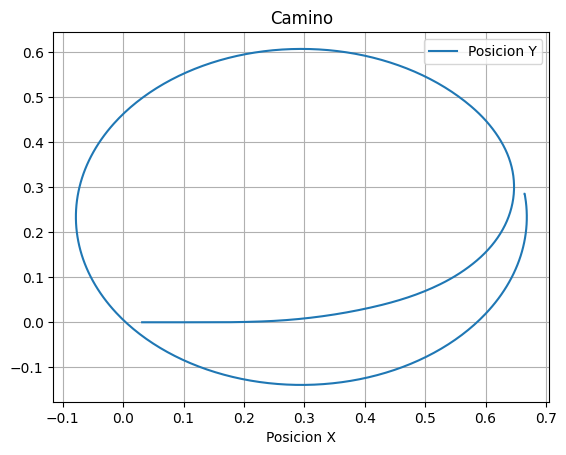

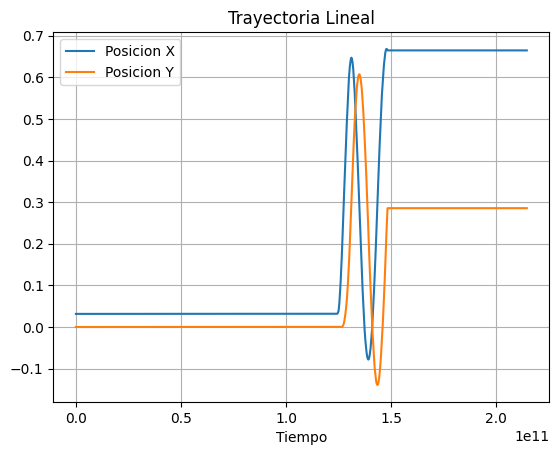

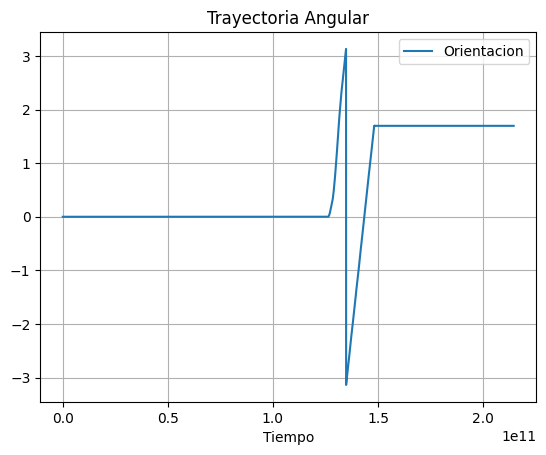

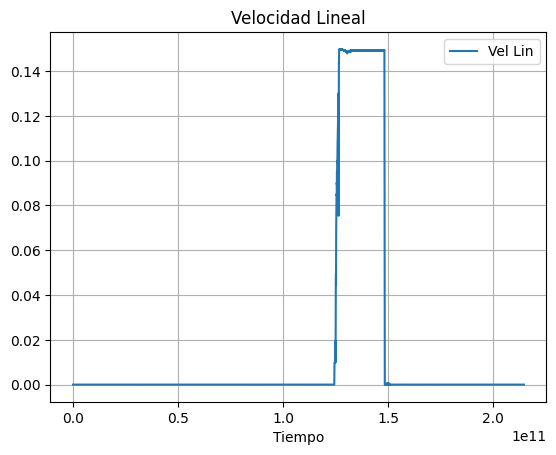

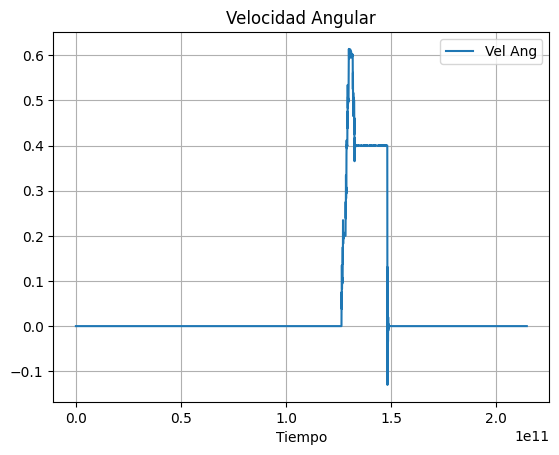

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Camino
tabla.plot(x='Posicion X', y='Posicion Y') 
plt.grid('on') #Grilla 
plt.title('Camino') #Título de imagen

# 2) Trayectoria Lineal y Angular
#Lineal
tabla.plot(x='Tiempo', y=['Posicion X', 'Posicion Y']) 
plt.grid('on')
plt.title('Trayectoria Lineal')

#Angular
tabla.plot(x='Tiempo',y='Orientacion') 
plt.grid('on')
plt.title('Trayectoria Angular')

# 3) Velocidad Lineal y Angular
# vel Lineal
tabla.plot(x='Tiempo', y='Vel Lin') 
plt.grid('on')
plt.title('Velocidad Lineal')

# vel Angular
tabla.plot(x='Tiempo', y='Vel Ang') 
plt.grid('on')
plt.title('Velocidad Angular')

**3-Obtener otro registro de datos para un camino circular del robot, iniciando el registro con el robot en el origen. Luego, gráfica el camino y la trayectoria (no las velocidades) y, en base a los gráficos, responder:**


¿Cuáles son los rangos de valores de las coordenadas (x) e (y), por qué?

*El rango de valores de los ejes (x) e (y), dependen del radio de giro que se le da al robot. Para este este ejemplo el radio de giro es de 1[m] como se observa en los plots.*
*El robot inicia su trayectoria desde el punto de origen (0,0). En donde en el eje X se desplaza desde (−1<x<1) y en el eje Y desde (0<y<2).*

¿Cuál es el rango de valores de la orientación del robot y por qué?

*El rango de valores de orientación del robot se pueden considerar de la siguiente manera: Partiendo desde el eje X en el semi eje positivo hasta el semi eje negativo en sentido horario (+π), y desde el semi eje positivo hasta el negativo en sentido anti horario (-π). Como el robot gira en sentido antihorario, recorre desde 0 a π y desde -π a 0 y asi sucesivamente*


C:\Users\DaniBrem\AppData\Local\Temp\ipykernel_728\1988546923.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  tabla_circ = pd.read_csv(log_odo_circ, header = None, delim_whitespace=True )


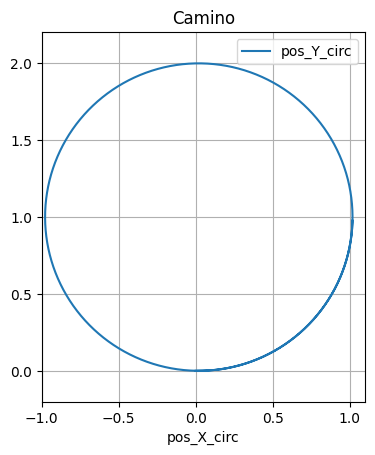

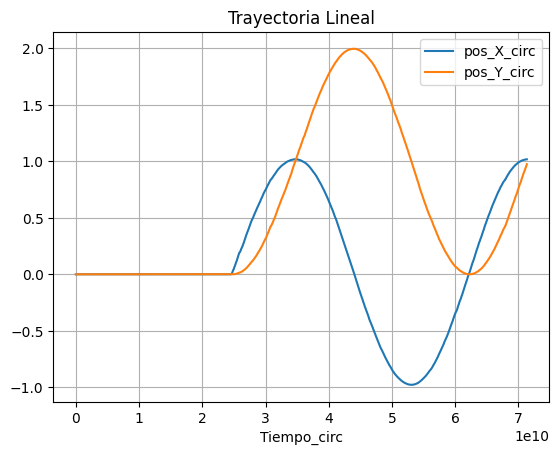

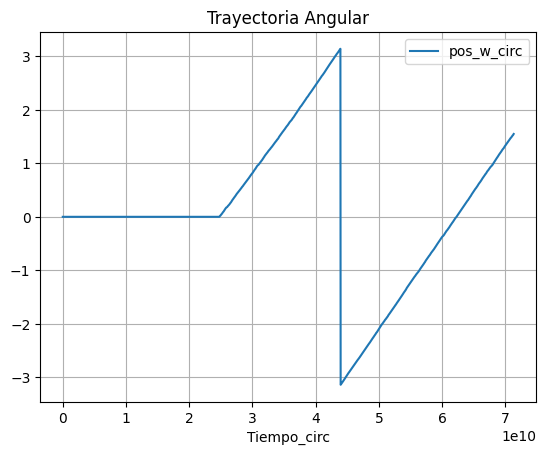

In [5]:
log_odo_circ = 'log_circ.txt' #Archivo de recorrido circular para le robot
tabla_circ = pd.read_csv(log_odo_circ, header = None, delim_whitespace=True )
tabla_circ.columns =['Tiempo_circ', 'pos_X_circ', 'pos_Y_circ', 'pos_w_circ', 'Vel_Lin_circ', 'Vel_Angular_circ']

tabla_circ = tabla_circ.loc[~(tabla_circ == 0).all(axis=1)]

tabla_circ['Tiempo_circ'] -= tabla_circ['Tiempo_circ'].min()

#1) Camino seguido
tabla_circ.plot(x='pos_X_circ', y='pos_Y_circ').set_aspect('equal') 
plt.grid('on')
plt.title('Camino')

#Límites de margen
plt.ylim([-0.2,2.2])
plt.xlim([-1,1.1])

#2) Trayectoria Lineal y Angular
#Lineal
tabla_circ.plot(x='Tiempo_circ', y=['pos_X_circ', 'pos_Y_circ']) 
plt.title('Trayectoria Lineal')
plt.grid('on')

#Angular
tabla_circ.plot(x='Tiempo_circ', y= 'pos_w_circ') 
plt.title('Trayectoria Angular')
plt.grid('on')




**4-Obtener diferentes registros y gráficos para caminos circulares con diferentes valores positivos y negativos de velocidades lineales y angulares, utilizando todas las combinaciones de signos posibles. Indicar en los gráficos el sentido de avance del robot.**

C:\Users\DaniBrem\AppData\Local\Temp\ipykernel_728\1626509464.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  tabla_test = pd.read_csv(log_odo_test, header = None, delim_whitespace=True )


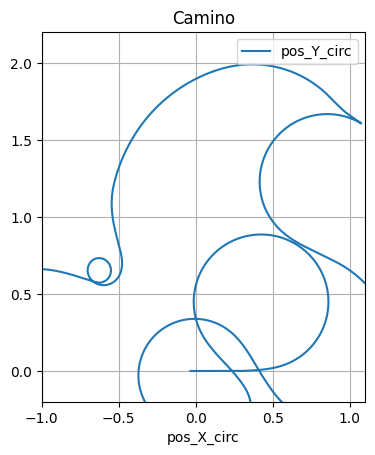

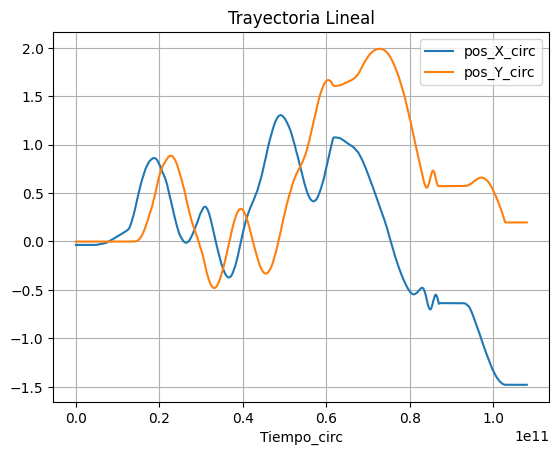

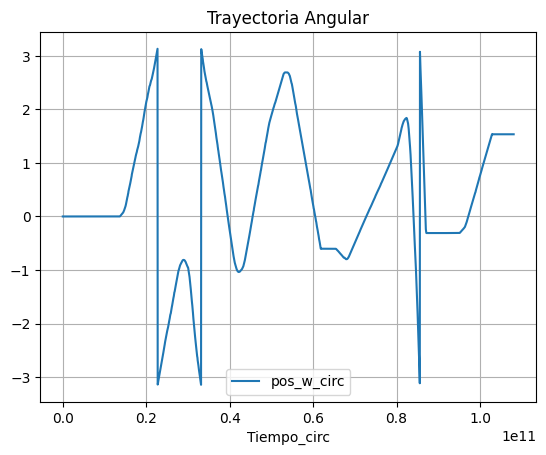

In [6]:
log_odo_test = 'logtest.txt'
tabla_test = pd.read_csv(log_odo_test, header = None, delim_whitespace=True )
tabla_test.columns =['Tiempo_circ', 'pos_X_circ', 'pos_Y_circ', 'pos_w_circ', 'Vel_Lin_circ', 'Vel_Angular_circ']

tabla_test = tabla_test.loc[~(tabla_test == 0).all(axis=1)]

tabla_test['Tiempo_circ'] -= tabla_test['Tiempo_circ'].min()

# tabla_circ[:5]

#1) Camino seguido
tabla_test.plot(x='pos_X_circ', y='pos_Y_circ').set_aspect('equal') 
plt.grid('on')
plt.title('Camino')

#Límites de margen
plt.ylim([-0.2,2.2])
plt.xlim([-1,1.1])

#2) Trayectoria Lineal y Angular
#Lineal
tabla_test.plot(x='Tiempo_circ', y=['pos_X_circ', 'pos_Y_circ']) 
plt.title('Trayectoria Lineal')
plt.grid('on')

#Angular
tabla_test.plot(x='Tiempo_circ', y= 'pos_w_circ') 
plt.title('Trayectoria Angular')
plt.grid('on')


**5-Describir mediante pseudo-código cuál sería la secuencia de comandos de velocidad a aplicar al robot para seguir el camino cuadrado**

Paso 1: Partiendo desde esquina superior izquierda:
1. Avanzar recto con velocidad lineal constante y angular cero por 1.2 metros.
2. Frenar.
3. Girar θ = π/2 con una cierta velocidad angular mientras avanza 0.4 metros en el arco. 

Paso 2: Lateral derecho hasta esquina inferior derecha:
1. Avanzar recto con velocidad lineal constante y angular cero por 1.2 metros.
2. Frenar.
3. Girar θ = π/2 con una cierta velocidad angular mientras avanza 0.4 metros en el arco. 

Paso 3: Inferior hasta esquina inferior izquierda:
1. Avanzar recto con velocidad lineal constante y angular cero por 1.2 metros.
2. Frenar.
3. Girar θ = π/2 con una cierta velocidad angular mientras avanza 0.4 metros en el arco. 

Paso 4: Lateral izquierdo hasta esquina superior izquierda:
1. Avanzar recto con velocidad lineal constante y angular cero por 1.2 metros.
2. Frenar.
3. Girar θ = π/2 con una cierta velocidad angular mientras avanza 0.4 metros en el arco. 


**6-Completar el nodo square_path para que el robot el robot TurtleBot3 simulado en Gazebo pueda ejecutar el camino cuadrado mostrado en el punto anterior.**



In [ ]:
# Nodo square_path modificado para que el robot realice la trayectorea deseada#
import threading
import rclpy
from rclpy.node import Node
from geometry_msgs.msg import Twist

class SquarePath(Node):

    def __init__(self):
        super().__init__('square_path')

        # Publicador del nodo
        self.vel_pub = self.create_publisher(Twist, 'cmd_vel', 10)

        # Variables de velocidad
        self.twist_v = Twist()

        # Spin in a separate thread
        thread = threading.Thread(target=rclpy.spin, args=(self, ), daemon=True)
        thread.start()

        self.rate_freq = 10.0
        self.rate = self.create_rate(self.rate_freq)

        # Espera a que se establezca la conexión
        n_sub = self.vel_pub.get_subscription_count()
        self.get_logger().info('n_sub: {}'.format(n_sub))
        while n_sub == 0:
            self.get_logger().info('Esperando conexión...')
            self.rate.sleep()
            n_sub = self.vel_pub.get_subscription_count()

        self.get_logger().info('Ejecutando camino...')
        
        # Ejecuta el camino
        try:
            while rclpy.ok():
                # Avance 1.2m
                self.move_straight(1.2)
                # Girar en la esquina
                self.turn_corner()
                # Avance 1.2m
                self.move_straight(1.2)
                # Girar en la esquina
                self.turn_corner()
                # Avance 1.2m
                self.move_straight(1.2)
                # Girar en la esquina
                self.turn_corner()
                # Avance 1.2m
                self.move_straight(1.2)
                # Girar en la esquina
                self.turn_corner()
                
        except KeyboardInterrupt:
            pass

    def move_straight(self, distance):
        # Tiempo necesario para moverse la distancia deseada
        time_to_move = distance / 0.2
        self.twist_v.linear.x = 0.2
        self.twist_v.angular.z = 0.0
        start_time = self.get_clock().now().seconds_nanoseconds()[0]
        while (self.get_clock().now().seconds_nanoseconds()[0] - start_time) < time_to_move:
            self.vel_pub.publish(self.twist_v)
            self.rate.sleep()
        self.twist_v.linear.x = 0.0
        self.vel_pub.publish(self.twist_v)
        self.rate.sleep()

    def turn_corner(self):
        # Tiempo necesario para girar 90 grados en una curva de radio 0.4m
        arc_length = (0.4 * 3.14159) / 2  # Longitud del arco (1/4 de circunferencia)
        time_to_turn = arc_length / 0.2
        self.twist_v.linear.x = 0.2
        self.twist_v.angular.z = 0.2 / 0.4  # ω = v / r
        start_time = self.get_clock().now().seconds_nanoseconds()[0]
        while (self.get_clock().now().seconds_nanoseconds()[0] - start_time) < time_to_turn:
            self.vel_pub.publish(self.twist_v)
            self.rate.sleep()
        self.twist_v.linear.x = 0.0
        self.twist_v.angular.z = 0.0
        self.vel_pub.publish(self.twist_v)
        self.rate.sleep()

def main(args=None):
    rclpy.init(args=args)
    square_path = SquarePath()
    rclpy.spin(square_path)

if __name__ == '__main__':
    main()

### Conclusiones

1. **Determinación del Radio de Camino Circular:**
   - Se comprobó que el radio del camino circular que sigue un robot, cuando se ajustan las velocidades lineal y angular a valores constantes, puede determinarse de manera analítica utilizando la fórmula 
   $ r = \frac{v}{\omega} $. Este método proporciona una base sólida para predecir el comportamiento del robot en trayectorias circulares.

2. **Cálculos con Valores Numéricos:**
   - Al realizar cálculos numéricos con distintas velocidades, se demostró la influencia directa de la velocidad angular en el radio del camino circular. Para velocidades lineales de \(0.1 \, \frac{m}{s}\) y \(0.05 \, \frac{m}{s}\) con una velocidad angular constante de \(1 \, \frac{rad}{s}\), los radios obtenidos fueron congruentes con las expectativas teóricas.

3. **Ajuste de Velocidades para Camino Circular Específico:**
   - Se ajustaron las velocidades lineal y angular para que el robot realizara un camino circular con un radio de \(1 \, m\). La velocidad lineal requerida fue de \(0.1 \, \frac{m}{s}\) y la velocidad angular calculada fue de \(0.1 \, \frac{rad}{s}\). Este ejercicio subraya la importancia del ajuste preciso de estos parámetros para lograr trayectorias específicas.

4. **Cálculo de Velocidades de Ruedas:**
   - Se calcularon las velocidades angulares de las ruedas izquierda y derecha para mantener el robot en un camino circular de radio \(1 \, m\) con una distancia entre ruedas de \(0.28 \, m\). Este cálculo es crucial para el control diferencial de robots móviles, destacando la interdependencia entre las velocidades de las ruedas y la trayectoria global del robot.

5. **Implementación en Código:**
   - La implementación de estos cálculos en código Python permitió simular el comportamiento del robot, confirmando la teoría con resultados prácticos. El uso de matrices y la solución de sistemas de ecuaciones lineales fueron esenciales para obtener las velocidades de las ruedas de manera precisa.

En resumen, este trabajo práctico demuestra la importancia de la cinemática en el control y la navegación de robots móviles. Los cálculos teóricos y su implementación práctica son fundamentales para diseñar robots capaces de seguir trayectorias predefinidas con alta precisión.